In [43]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import misc
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.gridspec as gridspec
from PIL import Image
import imageio

%matplotlib inline

In [44]:
df = pd.read_csv('Data/2001_stats.csv')

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Team           65 non-null     object
 1   Drives         65 non-null     object
 2   Yds/Dr Rank    65 non-null     object
 3   Yds/Dr         65 non-null     object
 4   Pts/Dr Rank    65 non-null     object
 5   Pts/Dr         65 non-null     object
 6   TO/Dr Rank     65 non-null     object
 7   TO/Dr          65 non-null     object
 8   INT/Dr Rank    65 non-null     object
 9   INT/Dr         65 non-null     object
 10  FUM/Dr Rank    65 non-null     object
 11  FUM/Dr         65 non-null     object
 12  LOS/Dr Rank    65 non-null     object
 13  LOS/Dr         65 non-null     object
 14  Plays/Dr Rank  65 non-null     object
 15  Plays/Dr       65 non-null     object
 16  TOP/Dr Rank    65 non-null     object
 17  TOP/Dr         65 non-null     object
 18  DSR Rank       65 non-null     o

In [46]:
rel_cols = ['Team', 'Drives', 'Yds/Dr Rank', 'Yds/Dr', 'Pts/Dr Rank', 'Pts/Dr', 'Plays/Dr','DSR Rank', 'DSR', 'Year']

In [47]:
def clean_data(data):
    df = pd.read_csv(data)
    string = data[5:9]
    teams = list(df['Team'].value_counts().index)
    total_teams = len(teams)
    df = df.iloc[:total_teams,:]
    df = df[df['Team'] != 'Team']
    df['Year'] = string
    df = df[rel_cols]
    return df

In [48]:
merged = pd.DataFrame()
for i in range(2000,2022):
    file = 'Data/' + str(i) + '_stats.csv'
    df = clean_data(file)
    merged = merged.append(df)

In [49]:
merged.append(df)

,Team,Drives,Yds/Dr Rank,Yds/Dr,Pts/Dr Rank,Pts/Dr,Plays/Dr,DSR Rank,DSR,Year
0,TEN,187,1,20.25,2,0.91,4.97,2,.558,2000
1,BAL,189,2,20.93,1,0.80,4.95,1,.555,2000
2,BUF,193,3,22.66,14,1.59,5.15,4,.609,2000
3,TB,199,4,23.20,5,1.28,5.39,6,.622,2000
4,NYJ,195,5,24.06,9,1.42,5.43,5,.614,2000
...,...,...,...,...,...,...,...,...,...,...
28,IND,38,19,36.08,25,2.55,6.03,21,.745,2021
29,ARI,44,9,31.86,7,1.64,5.91,10,.703,2021
30,BUF,44,1,18.64,1,0.84,4.91,1,.545,2021
31,DAL,42,18,35.64,14,2.14,5.98,17,.730,2021


In [50]:
shifted = ['Yds/Dr Rank', 'Yds/Dr', 'Pts/Dr Rank', 'Pts/Dr', 'DSR Rank', 'DSR']

In [51]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 724 entries, 0 to 32
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Team         724 non-null    object
 1   Drives       722 non-null    object
 2   Yds/Dr Rank  722 non-null    object
 3   Yds/Dr       724 non-null    object
 4   Pts/Dr Rank  722 non-null    object
 5   Pts/Dr       724 non-null    object
 6   Plays/Dr     724 non-null    object
 7   DSR Rank     722 non-null    object
 8   DSR          724 non-null    object
 9   Year         724 non-null    object
dtypes: object(10)
memory usage: 62.2+ KB


In [52]:
grouped = merged.groupby(['Team', 'Year']).sum().reset_index()

In [53]:
for col in shifted:
    grouped[col+'_shift'] = grouped.groupby('Team')[col].shift() 

In [54]:
nums = list(grouped.columns[1:])

In [55]:
grouped[nums] = grouped[nums].astype('float')

In [56]:
grouped

,Team,Year,Drives,Yds/Dr Rank,Yds/Dr,Pts/Dr Rank,Pts/Dr,Plays/Dr,DSR Rank,DSR,Yds/Dr Rank_shift,Yds/Dr_shift,Pts/Dr Rank_shift,Pts/Dr_shift,DSR Rank_shift,DSR_shift
0,ARI,2000.0,172.0,28.0,32.92,31.0,2.41,6.30,31.0,0.735,NaN,NaN,NaN,NaN,NaN,NaN
1,ARI,2001.0,182.0,25.0,29.92,22.0,1.77,6.03,26.0,0.687,28.0,32.92,31.0,2.41,31.0,0.735
2,ARI,2002.0,179.0,29.0,32.91,29.0,2.16,5.95,30.0,0.716,25.0,29.92,22.0,1.77,26.0,0.687
3,ARI,2003.0,179.0,28.0,30.41,31.0,2.18,5.65,32.0,0.712,29.0,32.91,29.0,2.16,30.0,0.716
4,ARI,2004.0,199.0,8.0,24.94,11.0,1.45,5.10,7.0,0.625,28.0,30.41,31.0,2.18,32.0,0.712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
719,WAS,2017.0,189.0,10.0,28.72,19.0,1.86,5.71,11.0,0.667,31.0,36.38,24.0,2.18,32.0,0.749
720,WAS,2018.0,163.0,25.0,35.15,18.0,2.04,6.21,23.0,0.727,10.0,28.72,19.0,1.86,11.0,0.667
721,WAS,2019.0,169.0,26.0,35.73,30.0,2.46,6.50,29.0,0.747,25.0,35.15,18.0,2.04,23.0,0.727
722,WAS,2020.0,182.0,3.0,27.07,3.0,1.74,5.59,3.0,0.663,26.0,35.73,30.0,2.46,29.0,0.747


In [57]:
for col in shifted:
    grouped[col+'_change'] = grouped[col+'_shift'] - grouped[col]

In [58]:
grouped = grouped.dropna()

In [59]:
shifted_list = []
for col in shifted:
    shifted_list.append(col+'_shift')

In [60]:
new_df = grouped.copy()

In [61]:
new_df.sort_values(by='Pts/Dr_change').head(20)

,Team,Year,Drives,Yds/Dr Rank,Yds/Dr,Pts/Dr Rank,Pts/Dr,Plays/Dr,DSR Rank,DSR,...,Pts/Dr Rank_shift,Pts/Dr_shift,DSR Rank_shift,DSR_shift,Yds/Dr Rank_change,Yds/Dr_change,Pts/Dr Rank_change,Pts/Dr_change,DSR Rank_change,DSR_change
349,KC,2021.0,37.0,32.0,45.62,32.0,3.38,7.00,32.0,0.835,...,13.0,2.13,19.0,0.743,-13.0,-9.97,-19.0,-1.25,-13.0,-0.092
723,WAS,2021.0,41.0,30.0,41.85,31.0,2.98,7.32,28.0,0.783,...,3.0,1.74,3.0,0.663,-27.0,-14.78,-28.0,-1.24,-25.0,-0.120
427,NE,2020.0,150.0,24.0,37.61,18.0,2.26,6.64,22.0,0.753,...,1.0,1.02,1.0,0.611,-23.0,-14.21,-17.0,-1.24,-21.0,-0.142
123,CHI,2013.0,172.0,32.0,37.27,31.0,2.44,6.05,31.0,0.740,...,1.0,1.31,2.0,0.633,-27.0,-10.50,-30.0,-1.13,-29.0,-0.107
681,TEN,2001.0,188.0,26.0,29.99,26.0,1.99,5.41,25.0,0.676,...,2.0,0.91,2.0,0.558,-25.0,-9.74,-24.0,-1.08,-23.0,-0.118
360,LAR,2021.0,37.0,29.0,41.49,23.0,2.49,7.73,30.0,0.787,...,1.0,1.48,1.0,0.648,-28.0,-16.53,-22.0,-1.01,-29.0,-0.139
370,MIA,2007.0,169.0,31.0,32.28,32.0,2.41,5.96,31.0,0.721,...,6.0,1.46,7.0,0.633,-23.0,-6.87,-26.0,-0.95,-24.0,-0.088
112,CHI,2002.0,194.0,18.0,29.02,22.0,1.91,5.78,16.0,0.676,...,1.0,0.96,4.0,0.621,-7.0,-2.99,-21.0,-0.95,-12.0,-0.055
405,MIN,2020.0,165.0,26.0,37.98,28.0,2.68,6.46,26.0,0.759,...,8.0,1.76,13.0,0.698,-8.0,-5.32,-20.0,-0.92,-13.0,-0.061
689,TEN,2009.0,186.0,23.0,31.18,28.0,2.12,5.69,26.0,0.699,...,3.0,1.22,5.0,0.623,-18.0,-6.31,-25.0,-0.90,-21.0,-0.076


In [62]:
new_df.columns

Index(['Team', 'Year', 'Drives', 'Yds/Dr Rank', 'Yds/Dr', 'Pts/Dr Rank',
       'Pts/Dr', 'Plays/Dr', 'DSR Rank', 'DSR', 'Yds/Dr Rank_shift',
       'Yds/Dr_shift', 'Pts/Dr Rank_shift', 'Pts/Dr_shift', 'DSR Rank_shift',
       'DSR_shift', 'Yds/Dr Rank_change', 'Yds/Dr_change',
       'Pts/Dr Rank_change', 'Pts/Dr_change', 'DSR Rank_change', 'DSR_change'],
      dtype='object')

#### Add DVOA

In [63]:
def clean_dvoa(file, year):
    df = pd.read_csv(file)
    df['Team'] = df['Team'].shift()
    df = df.dropna()
    df['Year'] = year
    df['Total DVOA'] = df['Total DVOA'].apply(lambda x: x[:-1])
    df['Total DVOA'] = df['Total DVOA'].astype(float)
    df['Total DVOA'] = df['Total DVOA'].apply(lambda x: x/100)
    df = df[['Team', 'Year', 'Total DVOA','Total DVOA Rank']]
    return df

In [64]:
dvoa = pd.DataFrame()
for i in range(2000,2022):
    df = clean_dvoa('Data/DVOA_' + str(i)+'.csv', i)
    dvoa = dvoa.append(df)

In [65]:
grouped_dvoa = dvoa.groupby(['Team', 'Year']).sum().reset_index()

In [66]:
grouped_dvoa

,Team,Year,Total DVOA,Total DVOA Rank
0,ARI,2000,0.208,30.0
1,ARI,2001,0.218,31.0
2,ARI,2002,0.203,32.0
3,ARI,2003,0.191,32.0
4,ARI,2004,-0.019,16.0
...,...,...,...,...
664,WAS,2017,-0.035,12.0
665,WAS,2018,0.028,20.0
666,WAS,2019,0.089,27.0
667,WAS,2020,-0.183,3.0


In [67]:
grouped_dvoa['DVOA_Rank_shift'] = grouped_dvoa.groupby('Team')['Total DVOA Rank'].shift() 
grouped_dvoa['DVOA_shift'] = grouped_dvoa.groupby('Team')['Total DVOA'].shift() 

In [68]:
grouped_dvoa = grouped_dvoa.dropna()

In [69]:
grouped_dvoa['diff'] = grouped_dvoa['DVOA_Rank_shift'] - grouped_dvoa['Total DVOA Rank'] 
grouped_dvoa['diff_DVOA'] = grouped_dvoa['DVOA_shift'] - grouped_dvoa['Total DVOA'] 

<ipython-input-69-4141b0dfff32>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_dvoa['diff'] = grouped_dvoa['DVOA_Rank_shift'] - grouped_dvoa['Total DVOA Rank']
<ipython-input-69-4141b0dfff32>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_dvoa['diff_DVOA'] = grouped_dvoa['DVOA_shift'] - grouped_dvoa['Total DVOA']


In [70]:
grouped_dvoa.sort_values(by='diff_DVOA').head(10)

,Team,Year,Total DVOA,Total DVOA Rank,DVOA_Rank_shift,DVOA_shift,diff,diff_DVOA
71,BUF,2005,0.098,29.0,1.0,-0.282,-28.0,-0.380
626,TEN,2001,0.105,26.0,1.0,-0.250,-25.0,-0.355
123,CHI,2013,0.094,25.0,1.0,-0.261,-24.0,-0.355
427,NE,2020,0.079,26.0,1.0,-0.252,-25.0,-0.331
668,WAS,2021,0.145,28.0,3.0,-0.183,-25.0,-0.328
634,TEN,2009,0.112,27.0,5.0,-0.183,-22.0,-0.295
653,WAS,2006,0.159,32.0,4.0,-0.116,-28.0,-0.275
208,DEN,2010,0.188,31.0,7.0,-0.086,-24.0,-0.274
81,BUF,2015,0.103,24.0,3.0,-0.157,-21.0,-0.260
546,PIT,2009,-0.038,13.0,1.0,-0.292,-12.0,-0.254


## Creating Charts

In [71]:
df_2021 = grouped[grouped['Year'] == 2021]

In [72]:
df_2021 = df_2021[df_2021['Team'] != 'NFL']

In [73]:
teams = list(df_2021['Team'].values)
names = []
for team in teams:
    names.append('Data/' + team +'.png')

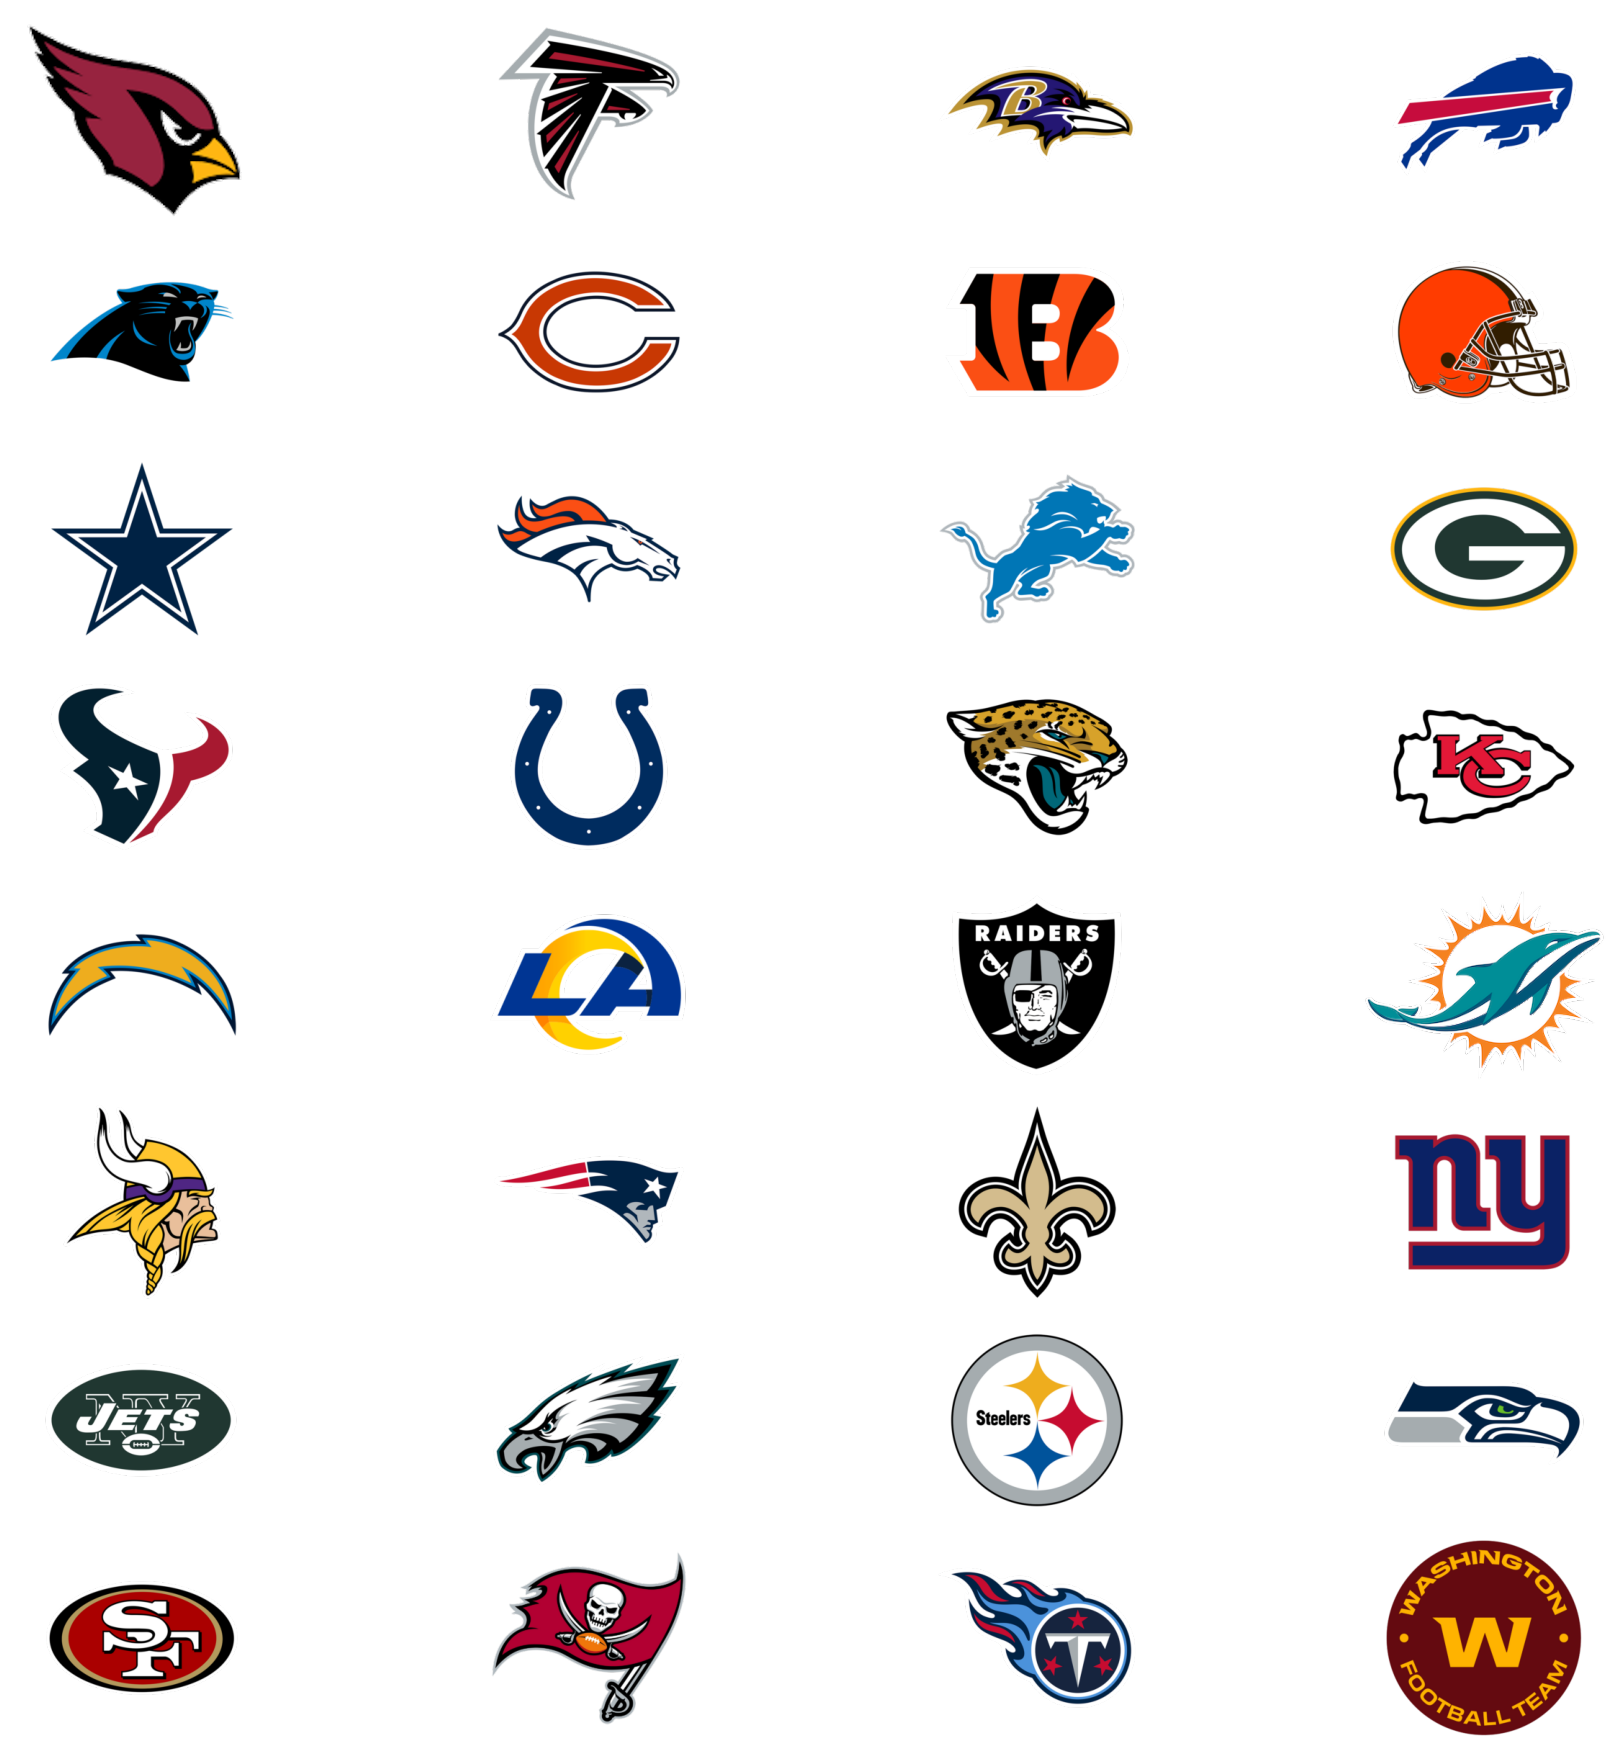

In [74]:
# use gridspec to create the subplots
plt.figure(figsize=(32,32))
gs1 = gridspec.GridSpec(8, 4)
gs1.update(wspace=0.01, hspace=0.01) # set the spacing between axes. 

for i,name in enumerate(names):
    ax1 = plt.subplot(gs1[i])
    Im = Image.open(name) # convert png string to an image format
    ax1.imshow(Im) # plot image
    plt.gca().axis('off')

In [75]:
colors = pd.read_csv("https://raw.githubusercontent.com/leesharpe/nfldata/master/data/teamcolors.csv")

In [76]:
colors

,team,color,color2,color3,color4
0,ARI,#97233f,#000000,#ffb612,#a5acaf
1,ARZ,#97233f,#000000,#ffb612,#a5acaf
2,ATL,#a71930,#000000,#a5acaf,#a30d2d
3,BAL,#241773,#000000,#9e7c0c,#c60c30
4,BLT,#241773,#000000,#9e7c0c,#c60c30
5,BUF,#00338d,#c60c30,#0c2e82,#d50a0a
6,CAR,#0085ca,#000000,#bfc0bf,#0085ca
7,CHI,#0b162a,#c83803,#0b162a,#c83803
8,CIN,#000000,#fb4f14,#000000,#d32f1e
9,CLE,#fb4f14,#22150c,#a5acaf,#d32f1e


In [77]:
colors = colors[['team', 'color']]

In [78]:
colors = colors.rename(columns={'team': 'Team'})

In [42]:
df_2021 = df_2021.merge(colors, how='inner', on='Team')

In [37]:
df_2021 = df_2021.sort_values(by=('Pts/Dr Rank_change'), ascending=False).reset_index(drop=True)

In [38]:
pos = df_2021.iloc[0:18:,:]

In [39]:
neg = df_2021.iloc[18:,:].reset_index(drop=True)

In [40]:
X2 = pos.index.values
Y2 = pos['Pts/Dr Rank_shift'].values
X1 = pos.index.values
Y1 = pos['Pts/Dr Rank'].values
names = pos['Team'].values
colors = pos['color'].values

In [41]:
plt.style.use('fivethirtyeight')

In [42]:
def scatter_plot_with_logos(X,Y,X2,Y2,names,colors):   
    artists = []
    for d,o,d2,o2,name,c in zip(X,Y,X2,Y2,names,colors):
        plt.plot(d2,o2,'o',color=c,markersize=16)
        plt.plot([d,d2],[o,o2],'--',color=c)
        im = imageio.imread('Data/' + name +'.png')
        im2 = OffsetImage(im, zoom=0.15,alpha=0.8)
        ab = AnnotationBbox(im2, (d, o), xycoords='data', frameon=False)
        artists.append(ax.add_artist(ab))

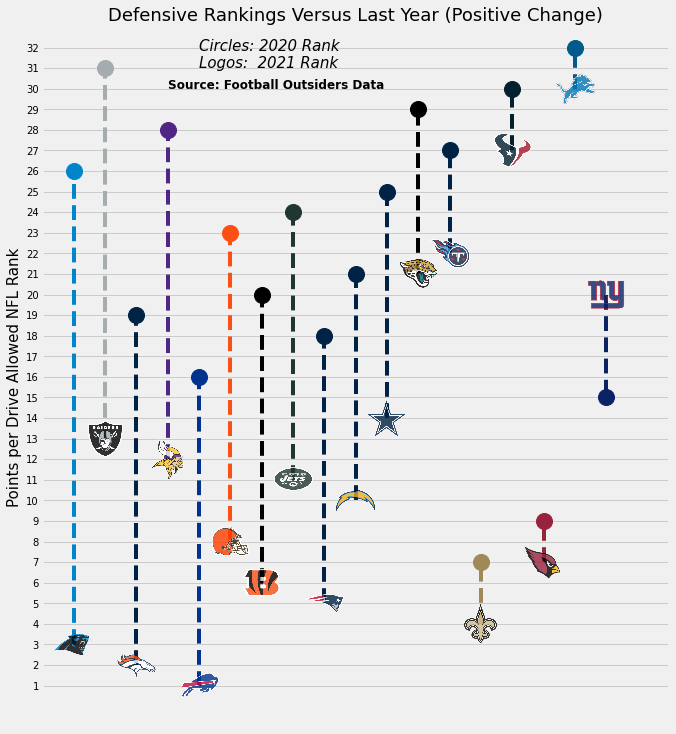

In [43]:
fig, ax = plt.subplots(figsize=(10,12))

# call function
scatter_plot_with_logos(X1,Y1,X2,Y2,names,colors)

# create labels and title 
plt.xticks([])
plt.yticks([i for i in range(1,33)], size=10)
plt.ylabel(r'Points per Drive Allowed NFL Rank',fontsize=15)
plt.ylim([-1,33]);
plt.xlim([-1,19]);
plt.title('Defensive Rankings Versus Last Year (Positive Change)',fontsize=18)
plt.text(3,30,'Source: Football Outsiders Data',color='black',fontsize=12,weight = 'bold')
plt.text(4,31,'Circles: 2020 Rank \nLogos:  2021 Rank',fontsize=15,style='italic');
plt.savefig('Pos_Def_rankings')

In [44]:
X2 = neg.index.values
Y2 = neg['Pts/Dr Rank_shift'].values
X1 = neg.index.values
Y1 = neg['Pts/Dr Rank'].values
names = neg['Team'].values
colors = neg['color'].values

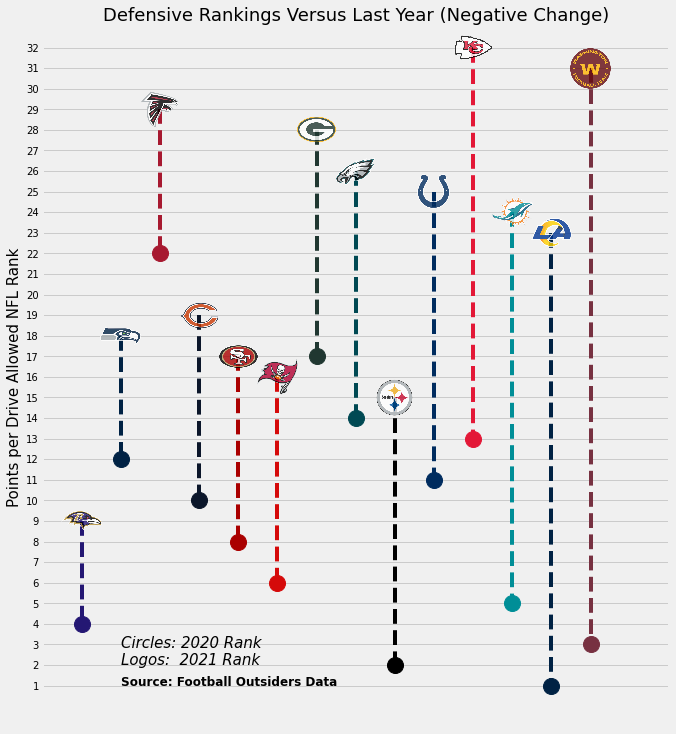

In [45]:
fig, ax = plt.subplots(figsize=(10,12))

# call function
scatter_plot_with_logos(X1,Y1,X2,Y2,names,colors)

# create labels and title 
plt.xticks([])
plt.yticks([i for i in range(1,33)], size=10)
plt.ylabel(r'Points per Drive Allowed NFL Rank',fontsize=15)
plt.ylim([-1,33]);
plt.xlim([-1,15]);
plt.title('Defensive Rankings Versus Last Year (Negative Change)',fontsize=18)
plt.text(1,1,'Source: Football Outsiders Data',color='black',fontsize=12,weight = 'bold')
plt.text(1,2,'Circles: 2020 Rank \nLogos:  2021 Rank',fontsize=15,style='italic');
plt.savefig('Neg_Def_rankings')

In [46]:
worst_jumps = new_df.sort_values(by='DSR Rank_change')[0:10].reset_index(drop=True)

In [47]:
worst_jumps

,Team,Year,Drives,Yds/Dr Rank,Yds/Dr,Pts/Dr Rank,Pts/Dr,Plays/Dr,DSR Rank,DSR,...,Pts/Dr Rank_shift,Pts/Dr_shift,DSR Rank_shift,DSR_shift,Yds/Dr Rank_change,Yds/Dr_change,Pts/Dr Rank_change,Pts/Dr_change,DSR Rank_change,DSR_change
0,CHI,2013.0,172.0,32.0,37.27,31.0,2.44,6.05,31.0,0.740,...,1.0,1.31,2.0,0.633,-27.0,-10.50,-30.0,-1.13,-29.0,-0.107
1,LAR,2021.0,37.0,29.0,41.49,23.0,2.49,7.73,30.0,0.787,...,1.0,1.48,1.0,0.648,-28.0,-16.53,-22.0,-1.01,-29.0,-0.139
2,HOU,2019.0,162.0,31.0,37.64,27.0,2.32,6.40,30.0,0.747,...,4.0,1.71,2.0,0.667,-25.0,-8.43,-23.0,-0.61,-28.0,-0.080
3,BUF,2005.0,171.0,31.0,31.74,28.0,2.01,6.13,31.0,0.725,...,6.0,1.40,4.0,0.614,-30.0,-9.21,-22.0,-0.61,-27.0,-0.111
4,KC,2008.0,175.0,30.0,35.82,30.0,2.39,6.11,30.0,0.727,...,13.0,1.59,3.0,0.636,-21.0,-9.10,-17.0,-0.80,-27.0,-0.091
5,GB,2011.0,178.0,29.0,35.64,23.0,1.96,6.02,28.0,0.722,...,2.0,1.24,2.0,0.628,-22.0,-9.15,-21.0,-0.72,-26.0,-0.094
6,BUF,2001.0,173.0,28.0,30.74,30.0,2.23,5.74,29.0,0.699,...,14.0,1.59,4.0,0.609,-25.0,-8.08,-16.0,-0.64,-25.0,-0.090
7,WAS,2021.0,41.0,30.0,41.85,31.0,2.98,7.32,28.0,0.783,...,3.0,1.74,3.0,0.663,-27.0,-14.78,-28.0,-1.24,-25.0,-0.120
8,PHI,2021.0,38.0,22.0,36.50,26.0,2.61,6.97,31.0,0.800,...,14.0,2.16,7.0,0.707,-15.0,-5.07,-12.0,-0.45,-24.0,-0.093
9,MIA,2007.0,169.0,31.0,32.28,32.0,2.41,5.96,31.0,0.721,...,6.0,1.46,7.0,0.633,-23.0,-6.87,-26.0,-0.95,-24.0,-0.088


In [48]:
output = worst_jumps[['Team', 'Year', 'DSR Rank_change', 'Pts/Dr Rank_change', 'Yds/Dr Rank_change']]

In [49]:
output['Year'] = output['Year'].astype('int')

<ipython-input-49-8a087e00013c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  output['Year'] = output['Year'].astype('int')


In [50]:
output = output.rename(columns={'DSR Rank_change': 'DSR Rank Drop', 'Pts/Dr Rank_change': 'Pts/Dr Rank Drop'})

In [51]:
output = output.rename(columns={'Yds/Dr Rank_change': 'Yds/Dr Rank Drop'})

In [52]:
output

,Team,Year,DSR Rank Drop,Pts/Dr Rank Drop,Yds/Dr Rank Drop
0,CHI,2013,-29.0,-30.0,-27.0
1,LAR,2021,-29.0,-22.0,-28.0
2,HOU,2019,-28.0,-23.0,-25.0
3,BUF,2005,-27.0,-22.0,-30.0
4,KC,2008,-27.0,-17.0,-21.0
5,GB,2011,-26.0,-21.0,-22.0
6,BUF,2001,-25.0,-16.0,-25.0
7,WAS,2021,-25.0,-28.0,-27.0
8,PHI,2021,-24.0,-12.0,-15.0
9,MIA,2007,-24.0,-26.0,-23.0


In [53]:
colors = pd.read_csv("https://raw.githubusercontent.com/leesharpe/nfldata/master/data/teamcolors.csv")
colors = colors[['team', 'color']]
colors = colors.rename(columns={'team': 'Team'})

In [54]:
worst_jumps = worst_jumps.merge(colors, how='inner', on='Team')

In [55]:
X2 = worst_jumps['Yds/Dr_shift'].values
Y2 = worst_jumps['Pts/Dr_shift'].values
X1 = worst_jumps['Yds/Dr'].values
Y1 = worst_jumps['Pts/Dr'].values
names = worst_jumps['Team'].values
colors = worst_jumps['color'].values
years = worst_jumps['Year'].values
years = [int(year) for year in years]

In [56]:
def scatter_plot_with_logos(X,Y,X2,Y2,names,colors,years):   
    artists = []
    for d,o,d2,o2,name,c,y in zip(X,Y,X2,Y2,names,colors,years):
        plt.plot(d2,o2,'o',color=c,markersize=16)
        plt.plot([d,d2],[o,o2],'--',color=c)
        plt.annotate(y, (d-1.5,o), bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'))
        im = imageio.imread('Data/' + name +'.png')
        im2 = OffsetImage(im, zoom=0.15,alpha=0.8)
        ab = AnnotationBbox(im2, (d, o), xycoords='data', frameon=False)
        artists.append(ax.add_artist(ab))

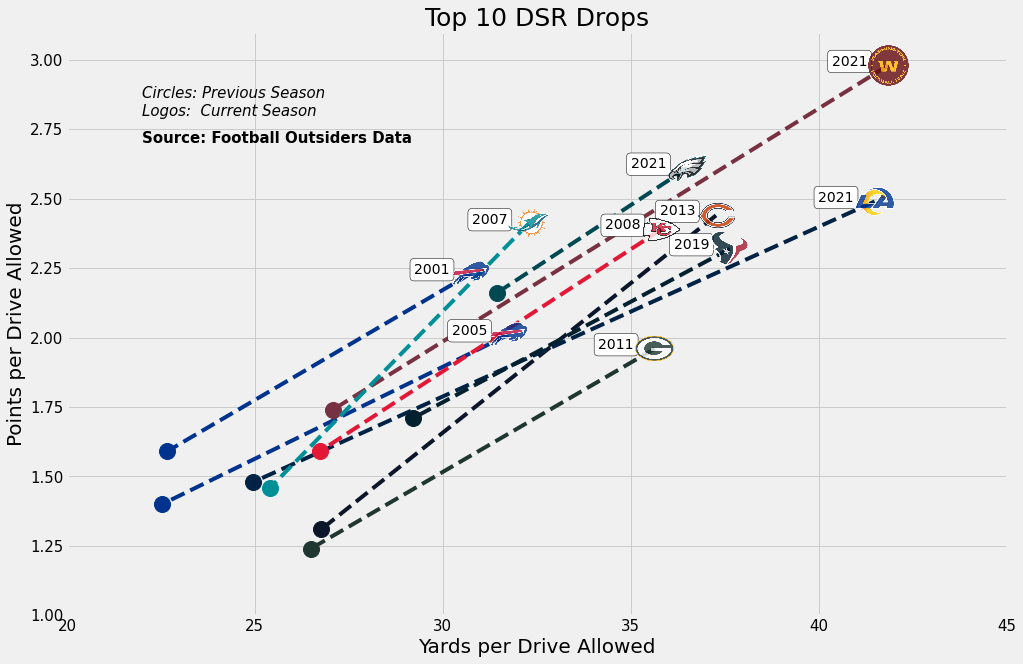

In [57]:
fig, ax = plt.subplots(figsize=(15,10))

# call function
scatter_plot_with_logos(X1,Y1,X2,Y2,names,colors,years)

# create labels and title 
plt.xticks(size=15)
plt.yticks(size=15)
plt.ylabel(r'Points per Drive Allowed',fontsize=20)
plt.xlabel(r'Yards per Drive Allowed',fontsize=20)
plt.ylim([1,3.1]);
plt.xlim([20,45]);
plt.title('Top 10 DSR Drops',fontsize=25)
plt.text(22,2.7,'Source: Football Outsiders Data',color='black',fontsize=15,weight = 'bold')
plt.text(22,2.8,'Circles: Previous Season \nLogos:  Current Season',fontsize=15,style='italic');
plt.savefig('Top_10')

In [58]:
df_third_down = pd.read_csv('Data/3rd_down.csv', index_col=0)

In [59]:
df_third_down.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 576 entries, 0 to 575
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Rank             576 non-null    int64 
 1   Team             576 non-null    object
 2   3rd_down_%       576 non-null    object
 3   Last 3           576 non-null    object
 4   Last 1           576 non-null    object
 5   Home             576 non-null    object
 6   Away             576 non-null    object
 7   Prev_3rd_down_%  576 non-null    object
 8   Year             576 non-null    int64 
dtypes: int64(2), object(7)
memory usage: 45.0+ KB


In [60]:
new_df['Year'] = new_df['Year'].astype(int)

In [61]:
full_name_teams = list(df_third_down.groupby('Team').count().index)

In [62]:
teams = ['ARI', 'ATL', 'BAL', 'BUF', 'CAR', 'CHI', 'CIN', 'CLE', 'DAL', 'DEN', 'DET', 'GB', 'HOU', 'IND', 'JAX', 'KC', 'LAC', 'LAR', 'LV', 'MIA', 'MIN', 'NYG', 'NYJ', 'NE', 'NO', 'PHI', 'PIT', 'SF', 'SEA', 'TB', 'TEN', 'WAS']

In [63]:
ids = {'ABB': teams,
      'full_name': full_name_teams}

In [64]:
ids = dict(zip(ids['full_name'], ids['ABB']))
print (ids)

{'Arizona': 'ARI', 'Atlanta': 'ATL', 'Baltimore': 'BAL', 'Buffalo': 'BUF', 'Carolina': 'CAR', 'Chicago': 'CHI', 'Cincinnati': 'CIN', 'Cleveland': 'CLE', 'Dallas': 'DAL', 'Denver': 'DEN', 'Detroit': 'DET', 'Green Bay': 'GB', 'Houston': 'HOU', 'Indianapolis': 'IND', 'Jacksonville': 'JAX', 'Kansas City': 'KC', 'LA Chargers': 'LAC', 'LA Rams': 'LAR', 'Las Vegas': 'LV', 'Miami': 'MIA', 'Minnesota': 'MIN', 'NY Giants': 'NYG', 'NY Jets': 'NYJ', 'New England': 'NE', 'New Orleans': 'NO', 'Philadelphia': 'PHI', 'Pittsburgh': 'PIT', 'San Francisco': 'SF', 'Seattle': 'SEA', 'Tampa Bay': 'TB', 'Tennessee': 'TEN', 'Washington': 'WAS'}


In [65]:
df_third_down['Team'] = df_third_down['Team'].replace(ids, regex=True)

In [66]:
df_third_down.sort_values(by='3rd_down_%', ascending=False).head(10)

,Rank,Team,3rd_down_%,Last 3,Last 1,Home,Away,Prev_3rd_down_%,Year
31,32,WAS,59.68%,53.49%,62.50%,58.06%,61.29%,37.83%,2021
30,31,MIA,54.24%,48.84%,40.00%,46.43%,61.29%,31.18%,2021
575,32,TEN,51.98%,48.48%,53.85%,55.73%,46.88%,39.18%,2020
29,30,LAR,50.00%,51.35%,61.54%,51.35%,45.45%,35.74%,2021
574,31,CAR,49.25%,43.90%,42.86%,43.16%,54.81%,39.90%,2020
287,32,LAC,49.23%,63.16%,61.54%,41.30%,56.31%,33.65%,2011
543,32,WAS,48.90%,60.00%,53.33%,50.89%,46.96%,43.88%,2019
511,32,CIN,48.88%,31.71%,33.33%,44.55%,53.10%,40.66%,2018
28,29,GB,48.78%,48.39%,36.36%,40.00%,57.14%,40.58%,2021
573,30,LV,48.78%,44.19%,43.75%,54.08%,43.93%,42.63%,2020


In [67]:
df_third_down.columns

Index(['Rank', 'Team', '3rd_down_%', 'Last 3', 'Last 1', 'Home', 'Away',
       'Prev_3rd_down_%', 'Year'],
      dtype='object')

In [68]:
rel_cols = ['3rd_down_%', 'Last 3', 'Last 1','Prev_3rd_down_%']

In [69]:
for col in rel_cols:
    df_third_down[col] = df_third_down[col].apply(lambda x: x[:-1])

In [70]:
for col in rel_cols:
    df_third_down[col] = df_third_down[col].astype(float)

In [71]:
new_df = new_df.merge(df_third_down, how='inner', on=['Team', 'Year'])

In [72]:
new_df.corr()

,Year,Drives,Yds/Dr Rank,Yds/Dr,Pts/Dr Rank,Pts/Dr,Plays/Dr,DSR Rank,DSR,Yds/Dr Rank_shift,...,Yds/Dr_change,Pts/Dr Rank_change,Pts/Dr_change,DSR Rank_change,DSR_change,Rank,3rd_down_%,Last 3,Last 1,Prev_3rd_down_%
Year,1.000000,-0.460269,0.006482,0.462671,0.009611,0.382453,0.440865,0.013983,0.466095,0.005662,...,-0.020782,-0.000139,-0.029986,0.000014,-0.031695,-0.000599,0.129978,0.031033,0.005457,0.147660
Drives,-0.460269,1.000000,-0.146950,-0.385400,-0.089107,-0.319843,-0.449992,-0.143186,-0.389468,-0.060040,...,0.036096,0.052655,0.009284,0.077846,0.018078,-0.131456,-0.209127,-0.092363,-0.039822,-0.214950
Yds/Dr Rank,0.006482,-0.146950,1.000000,0.828574,0.797889,0.715864,0.631584,0.925833,0.770535,0.342513,...,-0.531517,-0.449106,-0.451501,-0.513622,-0.487079,0.668624,0.627661,0.320273,0.158961,0.236138
Yds/Dr,0.462671,-0.385400,0.828574,1.000000,0.681628,0.857426,0.812651,0.779510,0.947121,0.277858,...,-0.562518,-0.406154,-0.487247,-0.447004,-0.528136,0.567274,0.637189,0.316134,0.152521,0.250138
Pts/Dr Rank,0.009611,-0.089107,0.797889,0.681628,1.000000,0.867306,0.418647,0.862844,0.724802,0.299808,...,-0.428555,-0.603170,-0.574717,-0.496431,-0.476872,0.600048,0.569372,0.301699,0.089597,0.180455
Pts/Dr,0.382453,-0.319843,0.715864,0.857426,0.867306,1.000000,0.610721,0.768714,0.902075,0.262310,...,-0.472072,-0.529651,-0.607345,-0.446999,-0.518875,0.533999,0.599179,0.301231,0.101399,0.220312
Plays/Dr,0.440865,-0.449992,0.631584,0.812651,0.418647,0.610721,1.000000,0.636424,0.819495,0.200663,...,-0.453485,-0.266634,-0.342031,-0.387532,-0.458000,0.571871,0.682295,0.324487,0.168355,0.218549
DSR Rank,0.013983,-0.143186,0.925833,0.779510,0.862844,0.768714,0.636424,1.000000,0.820935,0.354039,...,-0.477453,-0.485224,-0.484863,-0.564662,-0.518474,0.713285,0.667596,0.351759,0.145781,0.243510
DSR,0.466095,-0.389468,0.770535,0.947121,0.724802,0.902075,0.819495,0.820935,1.000000,0.282407,...,-0.511865,-0.427499,-0.516658,-0.471250,-0.563318,0.595520,0.668412,0.326797,0.138544,0.247283
Yds/Dr Rank_shift,0.005662,-0.060040,0.342513,0.277858,0.299808,0.262310,0.200663,0.354039,0.282407,1.000000,...,0.504021,0.411982,0.377620,0.508374,0.451636,0.231143,0.172076,0.086147,0.055393,0.663733


In [73]:
new_df = new_df[new_df['Year'] == 2021]

In [74]:
def scatter_plot_with_logos_third_down(X,Y,names):   
    artists = []
    for d,o,name in zip(X,Y,names):
        plt.plot(d,o)
        im = imageio.imread('Data/' + name +'.png')
        im2 = OffsetImage(im, zoom=0.15,alpha=0.8)
        ab = AnnotationBbox(im2, (d, o), xycoords='data', frameon=False)
        artists.append(ax.add_artist(ab))

In [75]:
X = new_df['Pts/Dr'].values
Y = new_df['3rd_down_%'].values
names = new_df['Team'].values

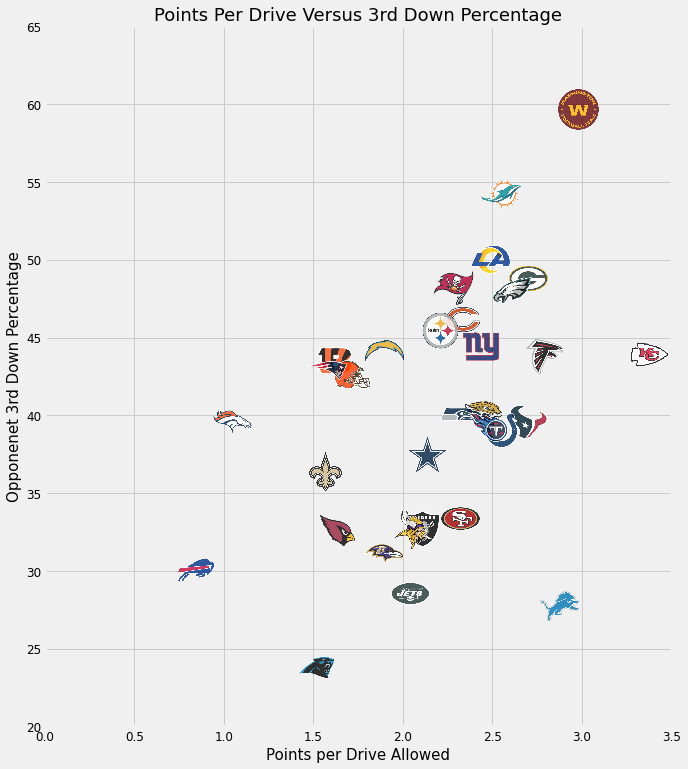

In [76]:
fig, ax = plt.subplots(figsize=(10,12))

# call function
scatter_plot_with_logos_third_down(X,Y,names)

# create labels and title 
plt.xticks(size=12)
plt.yticks(size=12)
plt.ylabel(r'Opponenet 3rd Down Percentage',fontsize=15)
plt.xlabel(r'Points per Drive Allowed',fontsize=15)
plt.ylim([20,65]);
plt.xlim([0,3.5]);
plt.title('Points Per Drive Versus 3rd Down Percentage',fontsize=18)
# plt.text(13,16,'Source: Football Outsiders Data',color='black',fontsize=12,weight = 'bold')
# plt.text(14,17,'Circles: 2020 Rank \nLogos:  2021 Rank',fontsize=15,style='italic');
plt.savefig('3rd_Down')

In [77]:
new_df['diff_3rd down'] = new_df['Prev_3rd_down_%'] - new_df['3rd_down_%']

In [80]:
new_df.sort_values(by='3rd_down_%', ascending=False)

,Team,Year,Drives,Yds/Dr Rank,Yds/Dr,Pts/Dr Rank,Pts/Dr,Plays/Dr,DSR Rank,DSR,...,DSR Rank_change,DSR_change,Rank,3rd_down_%,Last 3,Last 1,Home,Away,Prev_3rd_down_%,diff_3rd down
531,WAS,2021,41.0,30.0,41.85,31.0,2.98,7.32,28.0,0.783,...,-25.0,-0.120,32,59.68,53.49,62.50,58.06%,61.29%,37.83,-21.85
315,MIA,2021,42.0,21.0,36.45,24.0,2.55,6.86,22.0,0.756,...,-14.0,-0.046,31,54.24,48.84,40.00,46.43%,61.29%,31.18,-23.06
296,LAR,2021,37.0,29.0,41.49,23.0,2.49,7.73,30.0,0.787,...,-29.0,-0.139,30,50.00,51.35,61.54,51.35%,45.45%,35.74,-14.26
215,GB,2021,37.0,17.0,34.32,28.0,2.70,6.49,27.0,0.778,...,-11.0,-0.040,29,48.78,48.39,36.36,40.00%,57.14%,40.58,-8.20
495,TB,2021,46.0,14.0,33.76,16.0,2.28,5.87,16.0,0.728,...,-11.0,-0.025,28,48.21,46.15,22.22,46.88%,50.00%,41.25,-6.96
423,PHI,2021,38.0,22.0,36.50,26.0,2.61,6.97,31.0,0.800,...,-24.0,-0.093,27,48.00,58.33,90.00,62.50%,34.62%,37.91,-10.09
107,CHI,2021,39.0,23.0,36.85,19.0,2.33,6.54,20.0,0.736,...,-11.0,-0.024,26,46.15,43.90,36.36,41.67%,50.00%,40.09,-6.06
441,PIT,2021,42.0,11.0,32.45,15.0,2.21,6.26,11.0,0.705,...,-9.0,-0.055,25,45.45,45.95,60.00,36.36%,51.52%,37.71,-7.74
387,NYG,2021,39.0,28.0,39.41,20.0,2.44,6.82,24.0,0.759,...,-4.0,-0.014,24,44.44,43.59,61.54,42.86%,46.15%,44.61,0.17
291,LAC,2021,39.0,20.0,36.23,10.0,1.90,6.38,19.0,0.735,...,-5.0,-0.004,23,44.19,48.48,30.77,43.48%,45.00%,43.63,-0.56
